# Phase III: First ML Proof of Concept (5\%)

### Team Members:
- Annalise Cowing
- Carly Thoms
- Caroline Monaco
- Chand Duggal


In [ ]:
import requests
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
# Open Weather API - Data as of 4/17
API_KEY = "d7528d366d47194c2a4b5166f0a479e3"

cities = ["Minneapolis", "Boston", "San Diego", "Madison", "Washington, D.C.", "Juneau", "Des Moines", "Detroit"]

url = "https://api.openweathermap.org/data/2.5/forecast"

weather_data = []

for city in cities:
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(url, params=params)
    data = response.json()

    forecasts = data["list"]

    for forecast in forecasts:
        date_time = forecast["dt_txt"]
        temp = forecast["main"]["temp"]
        humidity = forecast["main"]["humidity"]
        wind_speed = forecast["wind"]["speed"]
        weather_condition = forecast["weather"][0]["main"]

        weather_data.append({"City": city, "Date": date_time, "Temperature (°C)": temp, "Humidity (%)": humidity, "Wind Speed (m/s)": wind_speed, "Weather Condition": weather_condition})

df = pd.DataFrame(weather_data)
df

,City,Date,Temperature (°C),Humidity (%),Wind Speed (m/s),Weather Condition
0,Minneapolis,2025-04-17 21:00:00,21.10,47,5.76,Rain
1,Minneapolis,2025-04-18 00:00:00,20.11,61,3.51,Rain
2,Minneapolis,2025-04-18 03:00:00,16.64,80,3.82,Rain
3,Minneapolis,2025-04-18 06:00:00,12.44,86,4.66,Clouds
4,Minneapolis,2025-04-18 09:00:00,10.23,82,4.01,Clouds
...,...,...,...,...,...,...
315,Detroit,2025-04-22 06:00:00,8.05,64,5.89,Clouds
316,Detroit,2025-04-22 09:00:00,6.61,67,5.63,Clouds
317,Detroit,2025-04-22 12:00:00,5.52,69,4.60,Clouds
318,Detroit,2025-04-22 15:00:00,9.80,49,5.26,Clear


## Part 1:
(2%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data

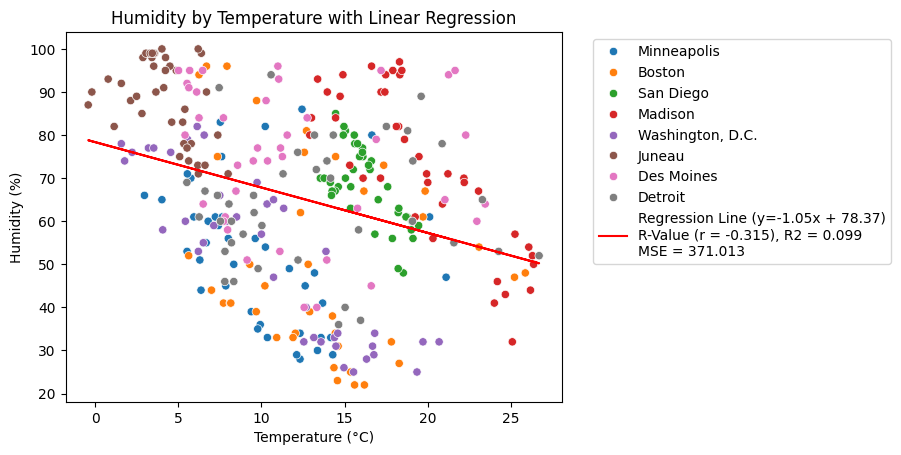

In [ ]:
regression = np.polyfit(df['Temperature (°C)'], df['Humidity (%)'], 1)
regression

line = regression[0] * df['Temperature (°C)'] + regression[1]

r_value = df['Temperature (°C)'].corr(df['Humidity (%)'])
linear_r2 = r_value ** 2
mse = mean_squared_error(df['Humidity (%)'], line)

sns.scatterplot(x = 'Temperature (°C)', y = 'Humidity (%)', data = df, hue = 'City')
plt.plot(df['Temperature (°C)'], line, color = 'red', label = f'Regression Line (y={regression[0]:.2f}x + {regression[1]:.2f})\nR-Value (r = {round(r_value, 3)}), R2 = {round(linear_r2, 3)}\nMSE = {round(mse, 3)}')

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Humidity by Temperature with Linear Regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

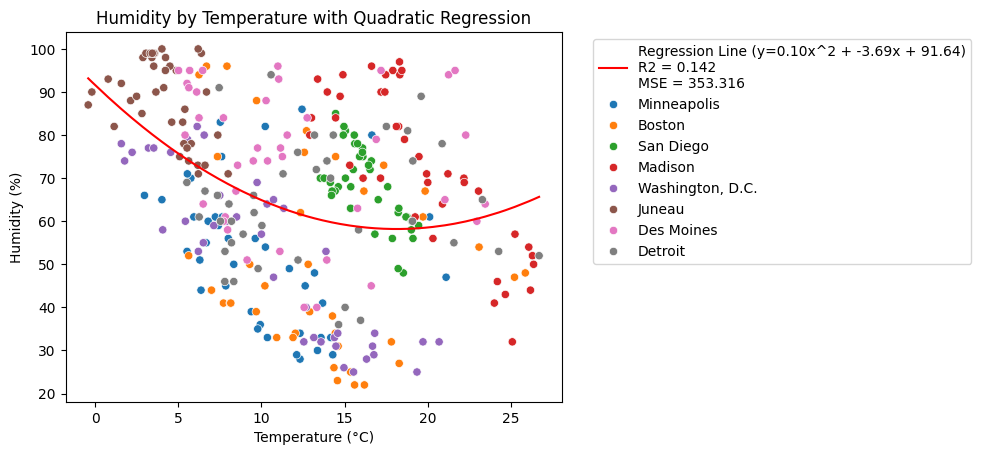

In [ ]:
regression2 = np.polyfit(df['Temperature (°C)'], df['Humidity (%)'], 2)

line = (regression2[0] * df['Temperature (°C)']**2) + (regression2[1] * df['Temperature (°C)']) + regression2[2]

polynomial_r2 = r2_score(df['Humidity (%)'], line)
polynomial_r = np.sqrt(polynomial_r2)
mse = mean_squared_error(df['Humidity (%)'], line)

sorted_df = df.sort_values(by='Temperature (°C)')
x_sorted = sorted_df['Temperature (°C)']
y_pred_sorted = (regression2[0] * x_sorted**2) + (regression2[1] * x_sorted) + regression2[2]

plt.plot(x_sorted, y_pred_sorted, color='red', label=f"Regression Line (y={regression2[0]:.2f}x^2 + {regression2[1]:.2f}x + {regression2[2]:.2f})\nR2 = {round(polynomial_r2, 3)}\nMSE = {round(mse, 3)}")  # Same label string
sns.scatterplot(x = 'Temperature (°C)', y = 'Humidity (%)', data = df, hue = 'City')

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Humidity by Temperature with Quadratic Regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

## Part 2:
(2%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data (3%) A discussion of the preliminary results:

* This may include checking of assumptions, generated plots/tables, measures of fit, or other attributes of the analysis
* It does not have to be fully correct, but as a proof of concept must demonstrate that the group is close to completing the analysis
* You must discuss some of the potential ethical considerations (or explain why there aren't any) for your project

This machine learning model was specifically meant to help answer our second key question: What is the relationship between increasing temperatures and humidity?  The line of best fit shows a close to 0 slope relationship, indicating that as temperature increases humidity does not go either up or down.  The r value of -0.076 also indicates an extremely weak correlation between the two categories, therefore indicating that the two are not closely related. Furthermore, the r-squared value is 0.006, indicating that changes in the temperature have little impact on the change in humidity. These r and r-squared values can be further confirmed by looking at the points on the graphs, where the dots appear to be randomly scattered. Both models have the same r- and r-squared values, representing the very weak association the points have with either model. For the linear regression example, the MSE is 385.591, and in the quadratic the MSE is 383.982. Both of these are very high, with the quadratic being just slightly lower. This means the quadratic fits the data a very slight bit better than the linear regression model.

There are a couple of ethical considerations to keep in mind with our dataset. The weather monitors are somewhat limited, as it can be inferred that there is only one monitor per city included in the data. This could mean that other areas of the city are underrepresented. For example, if a natural disaster were to be reported in a city, emergency assistance may not know where exactly to go. It is important to know where exactly the monitors are set up. If the monitors are in particular areas such as those which are high-income or most densely populated, this would neglect other areas. For example, say the average wind speed is much higher in an unmonitored, low-income part of the city. These winds could go unreported, meaning that people will not be warned of impending danger. If damage to homes were to occur, it may go unreported for longer, and people will have a harder time rebuilding. Similarly, there are certain indicators of dangerous weather. For instance, humidity is associated with thunderstorms. If an unmonitored area has high humidity and other indicators, the area may be under the threat of a storm and not know.

Also, there is only a sample of cities in the dataset. Naturally, this doesn't give a full picture - important findings from other cities are potentially being excluded.

There are no major privacy concerns with the dataset, as there is no personal information involved.

# Second ML Model

Our second ML model, which is coded below, utilizes scikit-learn.

### Humidity Testing

Mean Squared Error: 307.7089450111904
R-squared: 0.4037209779060119


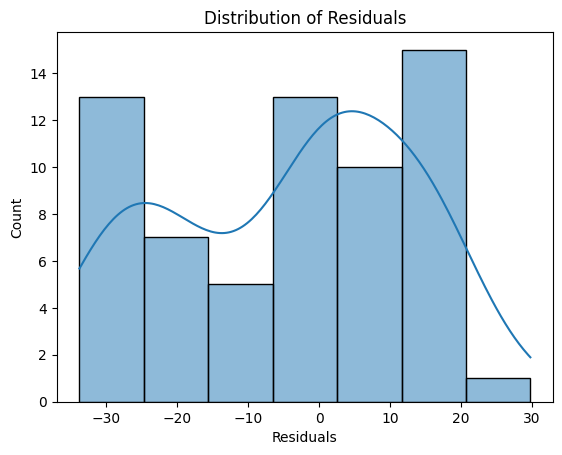

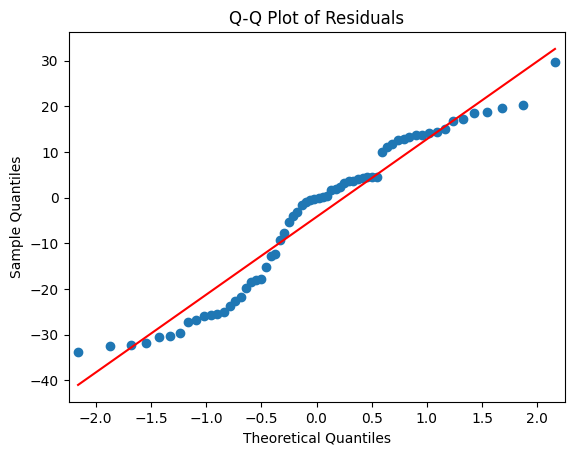

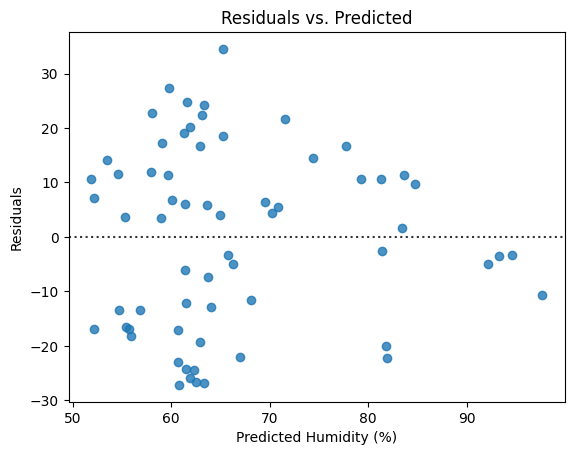

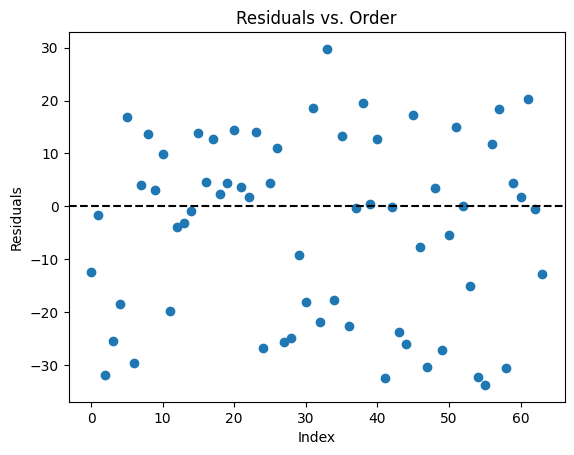

In [ ]:
# model w/ temp, wind, and weather condition features

# make weather condition numerical
df_dummies = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# establish features and targets
X = df_dummies[['Temperature (°C)', 'Wind Speed (m/s)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Humidity (%)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
residuals = y_test - y_pred
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Normality
sns.histplot(residuals, kde = True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Normality
sm.qqplot(residuals, line = 's')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Linearity
sns.residplot(x = y_pred, y = residuals)
plt.xlabel('Predicted Humidity (%)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

# Autocorrelation
plt.scatter(range(len(X_test)), residuals)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Order")
plt.show()

In [ ]:
# model w/ temp and wind features

# establish features and targets
X = df_dummies[['Temperature (°C)', 'Wind Speed (m/s)']]
y = df_dummies['Humidity (%)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 447.09212568619137
R-squared: 0.13362396572387747


In [ ]:
# model w/ temp and weather condition features

# establish features and targets
X = df_dummies[['Temperature (°C)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Humidity (%)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 319.8387824820445
R-squared: 0.38021575408154085


In [ ]:
# model w/ wind and weather condition features

# establish features and targets
X = df_dummies[['Wind Speed (m/s)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Humidity (%)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 316.11201561257093
R-squared: 0.3874374905325926


In [ ]:
# model w/ weather condition features

# establish features and targets
X = df_dummies[[col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Humidity (%)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 343.7591654474958
R-squared: 0.33386278711714445


Above demonstrates that humidity model is most accurate when features are Temperature, Wind Speed, and Weather Condition. It is also evident that Weather Condition is by far the best indicator of Humidity. The R^2 score for just Weather Condition is about 0.33, whereas the R^2 score for Wind Speed and Temperature is about 0.13. When all three features are used, the R^2 score is about 0.40. It is clear that the use of all three features produces the most accurate results, and that Weather Condition is the best predictor. MSE ranges from about 308 to 447.

### Temperature Testing

In [ ]:
# model w/ humidity, wind, and weather condition features

# establish features and targets
X = df_dummies[['Humidity (%)', 'Wind Speed (m/s)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Temperature (°C)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 20.355621208455855
R-squared: 0.3940528913383029


In [ ]:
# model w/ humidity and wind features

# establish features and targets
X = df_dummies[['Humidity (%)', 'Wind Speed (m/s)']]
y = df_dummies['Temperature (°C)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 21.263627879582934
R-squared: 0.36702330519202364


In [ ]:
# model w/ humidity and weather condition features

# establish features and targets
X = df_dummies[['Humidity (%)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Temperature (°C)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 26.256489647994513
R-squared: 0.2183955565453869


In [ ]:
# model w/ wind and weather condition features

# establish features and targets
X = df_dummies[['Wind Speed (m/s)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Temperature (°C)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 20.99762188764218
R-squared: 0.3749417843213282


In [ ]:
# model w/ weather condition features

# establish features and targets
X = df_dummies[[col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Temperature (°C)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 28.54595420628716
R-squared: 0.15024266574072953


Above demonstrates that all three features (Wind Speed, Humidity, and Weather Condition) is the most accurate predictor. The R^2 of the three features is about 0.39. In contrast, other R^2 scores range from about 0.15 for just Weather Condition to 0.37 for Wind Speed and Weather Condition. This indicates that of the features, Weather Condition is the best single predictor. However, all three features is the best predictor. It is also important to note that MSE ranges from 20-29.

### Wind Speed Testing

In [ ]:
# model w/ temp, humidity, and weather condition features

# make weather condition numerical
df_dummies = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# establish features and targets
X = df_dummies[['Temperature (°C)', 'Humidity (%)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Wind Speed (m/s)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5892565714782758
R-squared: 0.34617389931971965


In [ ]:
# model w/ temp and humidity features

# make weather condition numerical
df_dummies = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# establish features and targets
X = df_dummies[['Temperature (°C)', 'Humidity (%)']]
y = df_dummies['Wind Speed (m/s)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.6971013692604038
R-squared: 0.3018061459449739


In [ ]:
# model w/ temp and weather condition features

# make weather condition numerical
df_dummies = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# establish features and targets
X = df_dummies[['Temperature (°C)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Wind Speed (m/s)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.6723450390288765
R-squared: 0.311990992843154


In [ ]:
# model w/ humidity and weather condition features

# make weather condition numerical
df_dummies = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# establish features and targets
X = df_dummies[['Humidity (%)'] +
               [col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Wind Speed (m/s)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.0797431960031205
R-squared: 0.1443858665349229


In [ ]:
# model w/ weather condition features

# make weather condition numerical
df_dummies = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# establish features and targets
X = df_dummies[[col for col in df_dummies.columns if col.startswith('Weather Condition_')]]
y = df_dummies['Wind Speed (m/s)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.3055272963012436
R-squared: 0.0514974427631637


Once again, the model with all three features (Temperature, Humidity, and Weather Condition) is the best indicator of the predicted value (Wind Speed). The R^2 is about 0.35 for this. For other feature combinations, the R^2 value ranges from about 0.05 (just Weather Condition) to about 0.31 (Temperature and Weather Condition). This demonstrates that Weather Condition is the best single predictor, followed by Temperature. MSE ranges from about 1.6 to 2.3.